1. Age × Sex × Target Analysis

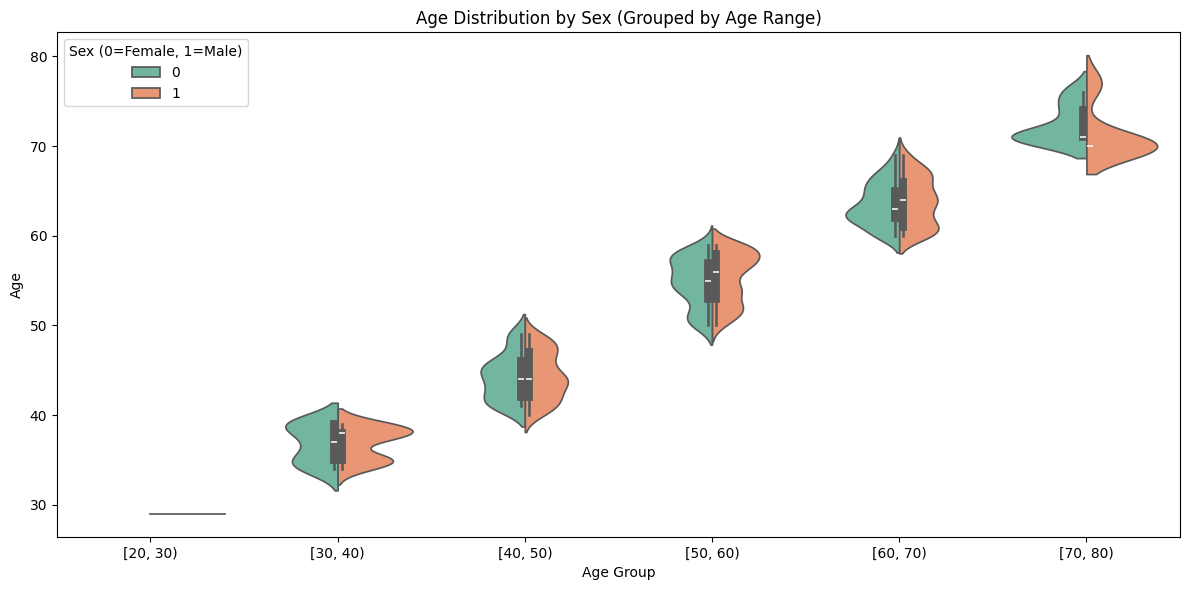

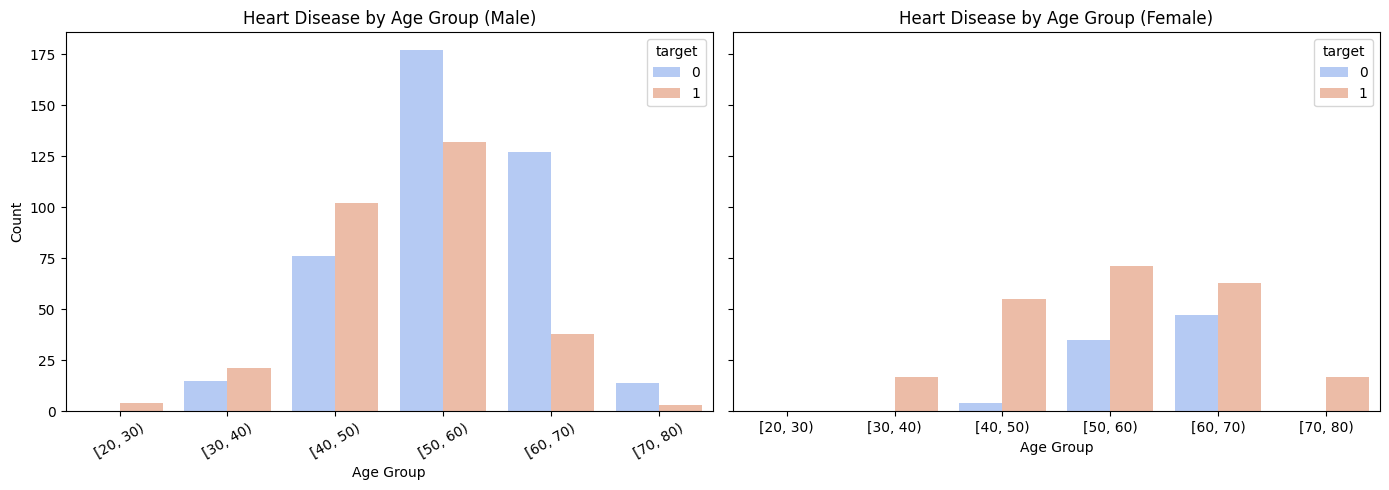

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df = pd.read_csv("heart.csv")

# Clean outliers: remove rows with thal = 0
df = df[df['thal'] != 0]

# Create an age grouping variable
df['age_group'] = pd.cut(df['age'], bins=[20, 30, 40, 50, 60, 70, 80], right=False)

# ========== Figure 1: Violin Figure ==========
plt.figure(figsize=(12, 6))
sns.violinplot(data=df, x='age_group', y='age', hue='sex', split=True, palette='Set2')
plt.title("Age Distribution by Sex (Grouped by Age Range)")
plt.xlabel("Age Group")
plt.ylabel("Age")
plt.legend(title="Sex (0=Female, 1=Male)")
plt.tight_layout()
plt.show()

# ========== Figure 2 & 3: Gender Bar Chart ===========
fig, axes = plt.subplots(1, 2, figsize=(14, 5), sharey=True)

# Male Bar Chart
male_data = df[df['sex'] == 1]
sns.countplot(data=male_data, x='age_group', hue='target', palette='coolwarm', ax=axes[0])
axes[0].set_title("Heart Disease by Age Group (Male)")
axes[0].set_xlabel("Age Group")
axes[0].set_ylabel("Count")
axes[0].tick_params(axis='x', rotation=30)

# Female bar graph
female_data = df[df['sex'] == 0]
sns.countplot(data=female_data, x='age_group', hue='target', palette='coolwarm', ax=axes[1])
axes[1].set_title("Heart Disease by Age Group (Female)")
axes[1].set_xlabel("Age Group")
axes[1].set_ylabel("")

plt.tight_layout()
plt.show()


2. cp × thal × target

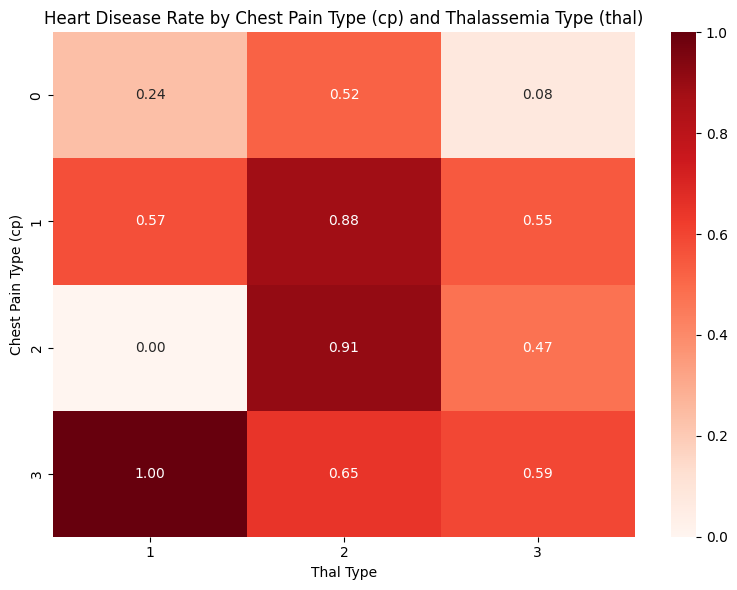

In [3]:
# Create a pivot table of the relationship between the interaction variable of cp and thal and target
cp_thal_target = df.groupby(['cp', 'thal', 'target']).size().unstack(fill_value=0).reset_index()

# Calculate the prevalence rate
cp_thal_target['Total'] = cp_thal_target[0] + cp_thal_target[1]
cp_thal_target['Heart Disease Rate'] = cp_thal_target[1] / cp_thal_target['Total']

# Visualization: Plot a heatmap of cp × thal (prevalence)
pivot_table = cp_thal_target.pivot(index='cp', columns='thal', values='Heart Disease Rate')

plt.figure(figsize=(8, 6))
sns.heatmap(pivot_table, annot=True, cmap='Reds', fmt=".2f")
plt.title("Heart Disease Rate by Chest Pain Type (cp) and Thalassemia Type (thal)")
plt.xlabel("Thal Type")
plt.ylabel("Chest Pain Type (cp)")
plt.tight_layout()
plt.show()


3. slope × ca × target

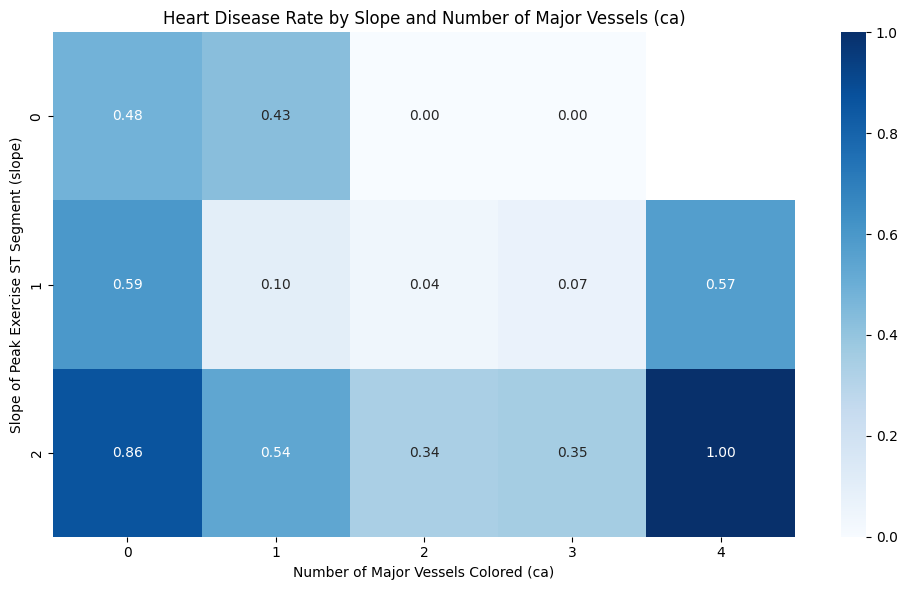

In [4]:
# Create a pivot table showing the relationship between the interaction variable of slope and ca and target
slope_ca_target = df.groupby(['slope', 'ca', 'target']).size().unstack(fill_value=0).reset_index()

# Calculate the prevalence rate
slope_ca_target['Total'] = slope_ca_target[0] + slope_ca_target[1]
slope_ca_target['Heart Disease Rate'] = slope_ca_target[1] / slope_ca_target['Total']

# Build a heatmap pivot table
pivot_slope_ca = slope_ca_target.pivot(index='slope', columns='ca', values='Heart Disease Rate')

# Visualizing heatmaps
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_slope_ca, annot=True, cmap='Blues', fmt=".2f")
plt.title("Heart Disease Rate by Slope and Number of Major Vessels (ca)")
plt.xlabel("Number of Major Vessels Colored (ca)")
plt.ylabel("Slope of Peak Exercise ST Segment (slope)")
plt.tight_layout()
plt.show()


4. thalach × oldpeak

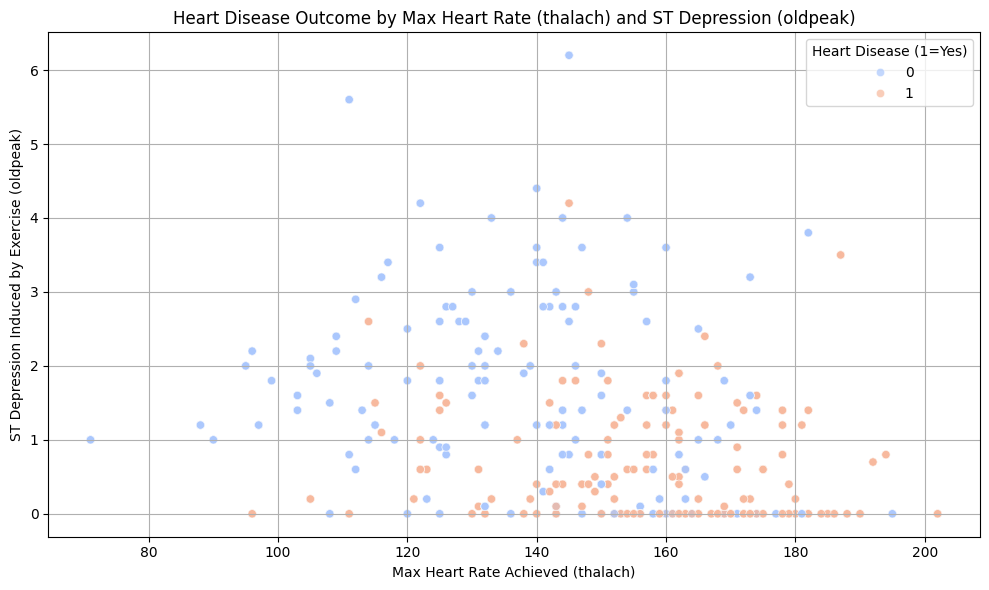

In [5]:
# Draw a scatter plot of thalach (maximum heart rate) and oldpeak (ST depression value)
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='thalach', y='oldpeak', hue='target', palette='coolwarm', alpha=0.7)

plt.title("Heart Disease Outcome by Max Heart Rate (thalach) and ST Depression (oldpeak)")
plt.xlabel("Max Heart Rate Achieved (thalach)")
plt.ylabel("ST Depression Induced by Exercise (oldpeak)")
plt.legend(title="Heart Disease (1=Yes)")
plt.grid(True)
plt.tight_layout()
plt.show()


Pearson Correlation Heatmap Of Heart Disease Dataset

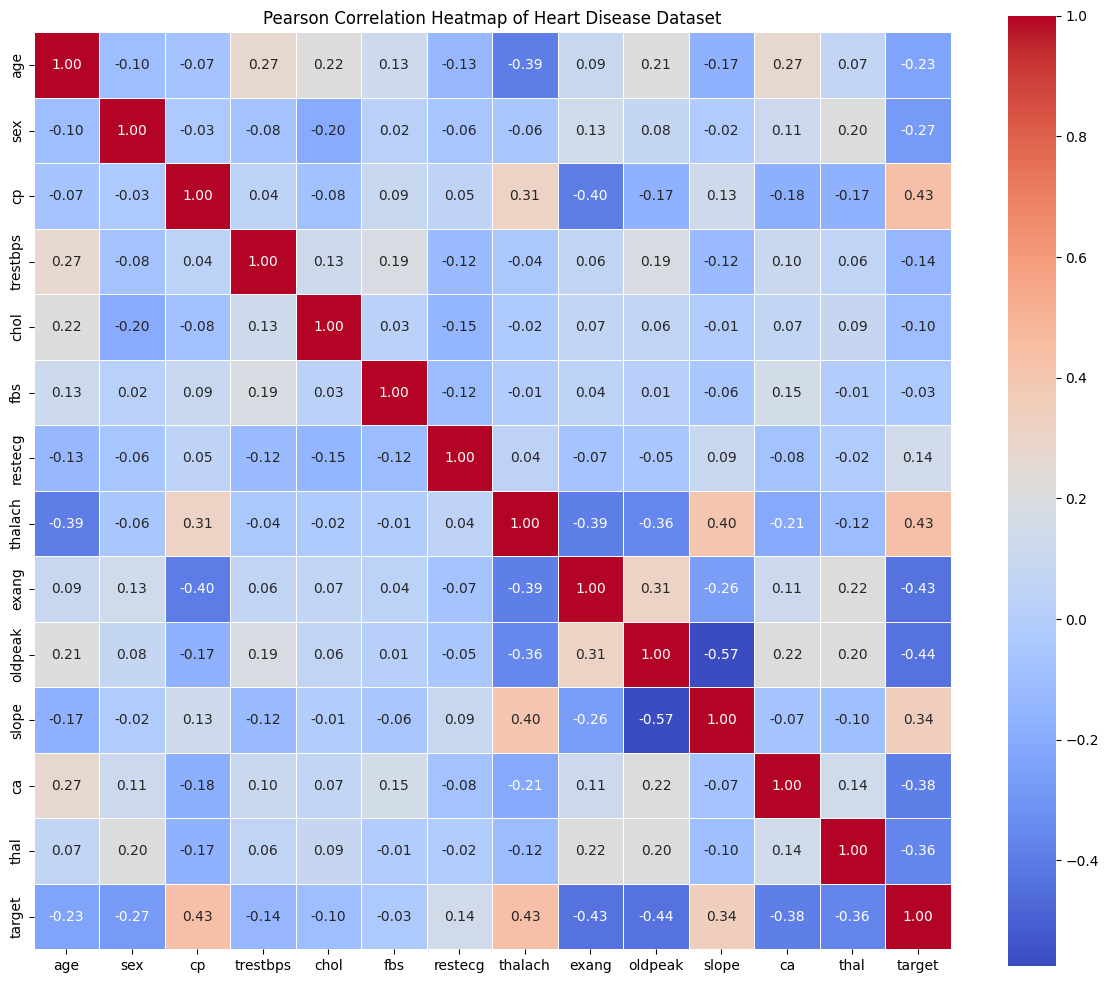

In [6]:
# Calculate the Pearson correlation matrix
corr_matrix = df.corr(numeric_only=True)

# Draw a heat map
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, linewidths=0.5)
plt.title("Pearson Correlation Heatmap of Heart Disease Dataset")
plt.tight_layout()
plt.show()
